<a href="https://colab.research.google.com/github/vlordier/colabs/blob/main/GoEmotions_model_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# cloning the repo for the GoEmotions-pytorch repository on Github

!git clone https://github.com/monologg/GoEmotions-pytorch.git

Cloning into 'GoEmotions-pytorch'...
remote: Enumerating objects: 45, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 45 (delta 2), reused 6 (delta 2), pack-reused 35
Unpacking objects: 100% (45/45), done.


In [ ]:
# setting the GoEmotions-pytorch repository as the main directory to run all code

%cd GoEmotions-pytorch

/content/GoEmotions-pytorch


In [ ]:
!git clone https://github.com/DTrimarchi10/confusion_matrix.git

Cloning into 'confusion_matrix'...
remote: Enumerating objects: 15, done.
remote: Total 15 (delta 0), reused 0 (delta 0), pack-reused 15
Unpacking objects: 100% (15/15), done.


In [ ]:
# installing the required dependencies for the code to run

!pip install -r /content/GoEmotions-pytorch/requirements.txt

     |████████████████████████████████| 753.4 MB 6.1 kB/s 
     |████████████████████████████████| 674 kB 43.2 MB/s 
     |████████████████████████████████| 5.6 MB 36.2 MB/s 
     |████████████████████████████████| 1.2 MB 54.5 MB/s 
     |████████████████████████████████| 895 kB 62.6 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.10.0+cu111
    Uninstalling torch-1.10.0+cu111:
      Successfully uninstalled torch-1.10.0+cu111
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.11.1+cu111 requires torch==1.10.0, but you have torch 1.4.0 which is incompatible.
torchtext 0.11.0 requires torch==1.10.0, but you have torch 1.4.0 which is incompatible.
torchaudio 0.10.0+cu111 requires torch==1.10.0, but you have torch 1.4.0 which is incompatible.


In [ ]:
# importing the required libraries

import json
import csv
from transformers import BertTokenizer
from model import BertForMultiLabelClassification
from multilabel_pipeline import MultiLabelPipeline
from pprint import pprint
import numpy as np
from confusion_matrix import cf_matrix
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# the hyper-parameters for training the original Taxonomy data can be changed here

original_file = open("config/original.json", "r")
json_object = json.load(original_file)
original_file.close()

# make the changes to the hyper-parameters you want
json_object['learning_rate'] = 5e-05 # default
json_object['warmup_proportion'] = 0.1 # default
json_object['num_train_epochs'] = 10 # default
json_object['max_seq_len'] = 50 # default
json_object['train_batch_size'] = 32 # default

# dump the contents of the updated json_object to the appropriate json file
original_file = open("config/original.json", "w")
json.dump(json_object, original_file)
original_file.close()

In [ ]:
# training the original Taxonomy data, which has 28 emotions (including neutral)
# all data is present in the github repo, change train to 1 if you want to train on original
# taxonomy data

train_or = 0
if train_or:
  !python3 run_goemotions.py --taxonomy original

In [ ]:
group_file = open("config/group.json", "r")
json_object = json.load(group_file)
group_file.close()

# make the changes to the hyper-parameters you want
json_object['learning_rate'] = 5e-05 # default
json_object['warmup_proportion'] = 0.1 # default
json_object['num_train_epochs'] = 10 # default
json_object['max_seq_len'] = 50 # default
json_object['train_batch_size'] = 16 # default

# dump the contents of the updated json_object to the appropriate json file
group_file = open("config/group.json", "w")
json.dump(json_object, group_file)
group_file.close()

In [ ]:
# training the grouped Taxonomy data, which has 4 labels (positive, negative, ambiguous, neutral)
# all data is present in the github repo, change train to 1 if you want to train on group
# taxonomy data

train_gr = 0
if train_gr:
  !python3 run_goemotions.py --taxonomy group

In [ ]:
ekman_file = open("config/ekman.json", "r")
json_object = json.load(ekman_file)
ekman_file.close()

# make the changes to the hyper-parameters you want
json_object['learning_rate'] = 5e-05 # default
json_object['warmup_proportion'] = 0.1 # default
json_object['num_train_epochs'] = 10 # default
json_object['max_seq_len'] = 50 # default
json_object['train_batch_size'] = 16 # default

# dump the contents of the updated json_object to the appropriate json file
ekman_file = open("config/ekman.json", "w")
json.dump(json_object, ekman_file)
ekman_file.close()

In [ ]:
# training the ekman Taxonomy data, which has 7 emotions (anger, disgust, fear, joy, sadness, surprise, neutral)
# all data is present in the github repo, change train to 1 if you want to train on group
# taxonomy data

train_ek = 0
if train_ek:
  !python3 run_goemotions.py --taxonomy ekman

In [ ]:
# loading the original GoEmotions taxonomy model for inference

taxonomy_model = 'ekman' # change model to 'original', 'group' or 'ekman'
tokenizer = BertTokenizer.from_pretrained(f"monologg/bert-base-cased-goemotions-{taxonomy_model}")
model = BertForMultiLabelClassification.from_pretrained(f"monologg/bert-base-cased-goemotions-{taxonomy_model}")

goemotions = MultiLabelPipeline(
    model=model,
    tokenizer=tokenizer,
    threshold=0.3
)

Downloading:   0%|          | 0.00/242k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/188 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/243 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/812 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/433M [00:00<?, ?B/s]

In [ ]:
# loading test tsv file for inference (original Taxonomy)

test_X = open(f'data/{taxonomy_model}/test.tsv')
dev_X = open(f'data/{taxonomy_model}/dev.tsv')
labels = open(f'data/{taxonomy_model}/labels.txt')
read_test = csv.reader(test_X, delimiter='\t')
read_dev = csv.reader(dev_X, delimiter='\t')
read_labels = csv.reader(labels, delimiter='\n')

In [ ]:
# seperating the test text and the labels for each text for evaluation metrics

i = 0
labels_to_emot_dict = {}
emot_to_labels_dict = {}
test_text = []
test_labels = []
dev_text = []
dev_labels = []
for label in read_labels:
  labels_to_emot_dict[i] = label[0]
  emot_to_labels_dict[label[0]] = i
  i += 1

for data in read_test:
  if (len(data[1]) == 1) or (len(data[1]) == 2):
    test_text.append(data[0])
    test_labels.append(data[1])
  else:
    continue

for data in read_dev:
  if (len(data[1]) == 1) or (len(data[1]) == 2):
    dev_text.append(data[0])
    dev_labels.append(data[1])
  else:
    continue

In [ ]:
print(f'Number of test samples: {len(test_text)}')
print(f'Number of val samples: {len(dev_text)}')

Number of test samples: 4968
Number of val samples: 4946


In [ ]:
# showing an example from the test data

text = test_text[21]
label = test_labels[21]
emotion = labels_to_emot_dict[int(label)]
print(text+'\n', emotion)

Well, there's cubs and otters too.
 neutral


In [ ]:
# getting the predictions of the emotions for the test text set
# so that they can be used for evaluation metrics and confusion matrix

test_pred = []
i = 0
no_scores_test_idx = []
for text in test_text:
  pred_label_score = goemotions(text)
  label = pred_label_score[0]['labels']
  scores = pred_label_score[0]['scores']
  if scores:
    max_index = np.where(np.array(scores)==max(scores))
    label_pr = label[int(max_index[0])]
    test_pred.append(emot_to_labels_dict[label_pr])
  else:
    no_scores_test_idx.append(i)
  i += 1

In [ ]:
# getting the predictions of the emotions for the dev text set
# so that they can be used for evaluation metrics and confusion matrix

dev_pred = []
i = 0
no_scores_dev_idx = []
for text in dev_text:
  pred_label_score = goemotions(text)
  label = pred_label_score[0]['labels']
  scores = pred_label_score[0]['scores']
  if scores:
    max_index = np.where(np.array(scores)==max(scores))
    label_pr = label[int(max_index[0])]
    dev_pred.append(emot_to_labels_dict[label_pr])
  else:
    no_scores_dev_idx.append(i)
  i += 1

In [ ]:
# removing the labels which returned no scores

test_labels = np.delete(np.array(test_labels), no_scores_test_idx)
dev_labels = np.delete(np.array(dev_labels), no_scores_dev_idx)

In [ ]:
test_lbls = np.array(pd.Series(test_labels).astype(int).map(labels_to_emot_dict)).astype(str)
test_prds = np.array(pd.Series(test_pred).astype(int).map(labels_to_emot_dict)).astype(str)
dev_lbls = np.array(pd.Series(dev_labels).astype(int).map(labels_to_emot_dict)).astype(str)
dev_prds = np.array(pd.Series(dev_pred).astype(int).map(labels_to_emot_dict)).astype(str)

In [ ]:
test_f1 = f1_score(test_lbls, test_prds, average='weighted')
val_f1 = f1_score(dev_lbls, dev_prds, average='weighted')

In [ ]:
print('F1 score for test set: %.3f' %(test_f1))
print('F1 score for val set: %.3f'%(val_f1))

F1 score for test set: 0.683
F1 score for val set: 0.681


In [ ]:
test_cm = confusion_matrix(test_lbls, test_prds, labels=list(labels_to_emot_dict.values()))
dev_cm = confusion_matrix(dev_lbls, dev_prds, labels=list(labels_to_emot_dict.values()))

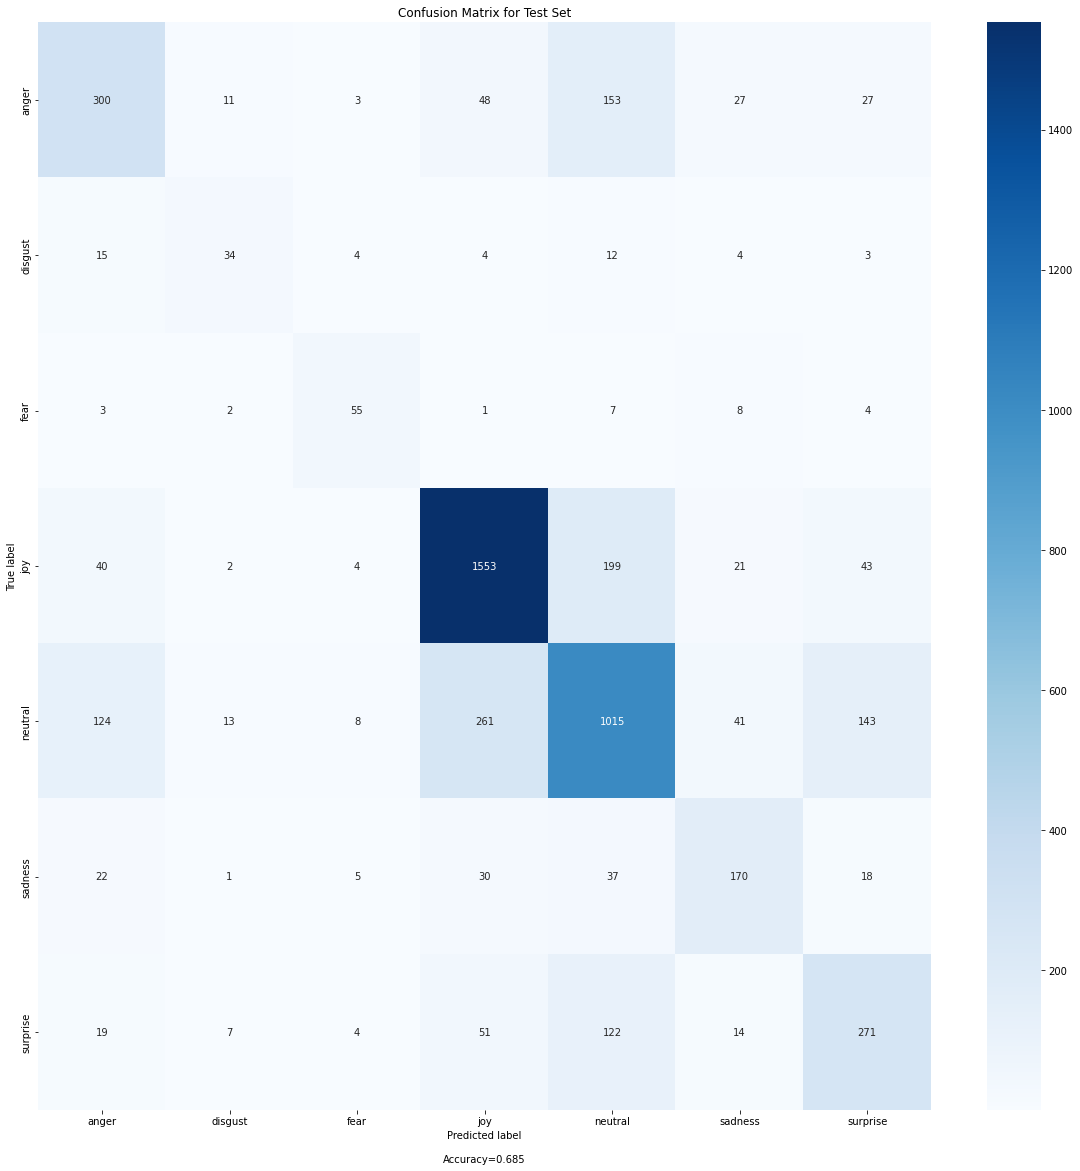

In [ ]:
categories = list(labels_to_emot_dict.values())
cf_matrix.make_confusion_matrix(test_cm, figsize=(20,20), categories=categories, percent=False,
                                title = 'Confusion Matrix for Test Set')

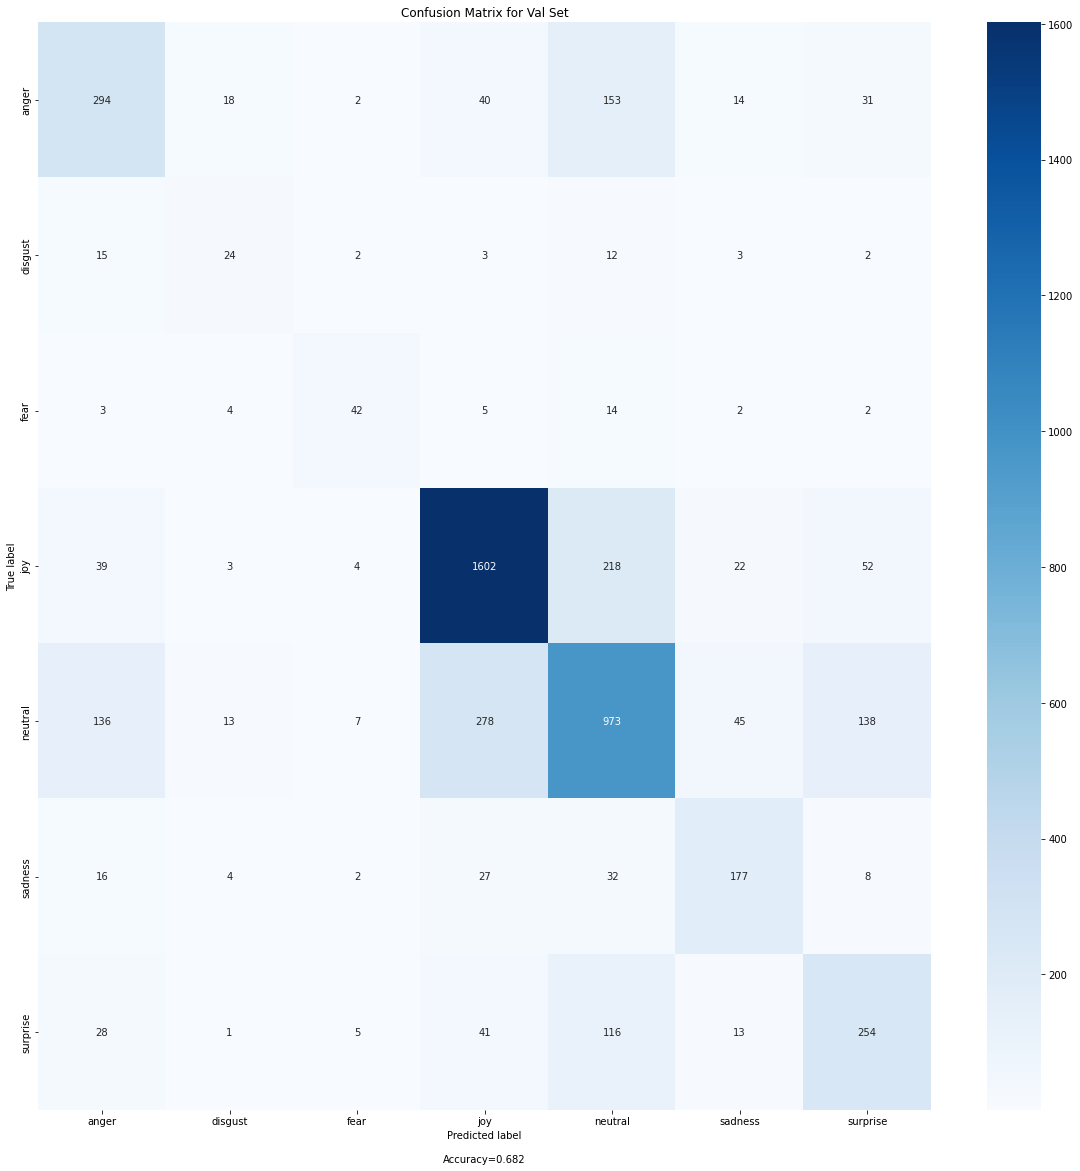

In [ ]:
cf_matrix.make_confusion_matrix(dev_cm, figsize=(20,20), categories=categories, percent=False,
                                title = 'Confusion Matrix for Val Set')